In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [10]:
import pandas as pd
from learning_analysis import learning_analysis
from bias_variance_analysis import bias_variance_analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
# Read the preprocessed dataset
df = pd.read_csv('../dataset/body_level_classification_train_preprocessed.csv')

X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

In [4]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

In [17]:
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'solver': ['liblinear', 'saga' , 'lbfgs']
              }

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.9882563161716929


In [18]:
# Fit the logistic regression model
model_architecture = LogisticRegression(C=100)

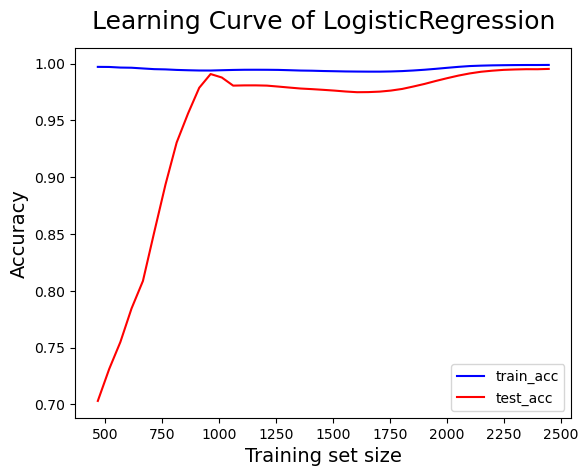

In [13]:
learning_analysis(model_architecture, X, y)

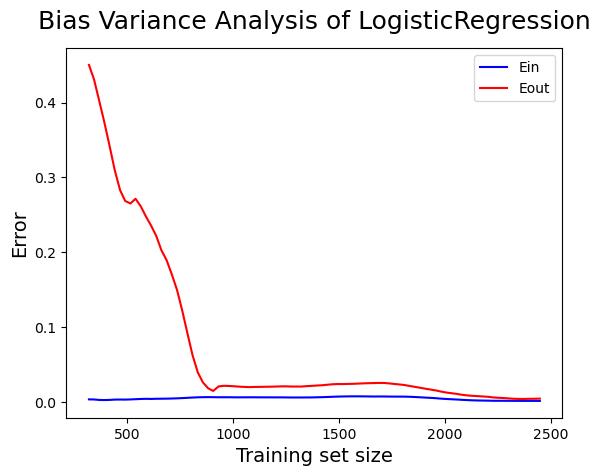

In [14]:
bias_variance_analysis(model_architecture, X, y)

In [19]:
# Fit the model
model = model_architecture.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted', multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9889705882352942
Precision: 0.9892367402589932
Recall: 0.9889705882352942
F1-score: 0.9889943883378729
AUC-ROC: 0.992690945198862


In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       212
           2       0.97      0.99      0.98       196
           3       0.99      1.00      0.99       215
           4       1.00      0.99      1.00       193

    accuracy                           0.99       816
   macro avg       0.99      0.99      0.99       816
weighted avg       0.99      0.99      0.99       816

